In [183]:
from bs4 import BeautifulSoup as bs
import requests
import os
import pandas as pd
import html5lib
import io
from zipfile import ZipFile
import urllib.request
import re
from lxml import html
from splinter import Browser

In [20]:
url = "http://www.city-data.com/zipmaps/New-York-New-York.html"

In [21]:
requests.get(url)
response = requests.get(url)

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="en" http-equiv="Content-Language"/>
<meta content="IE=7, IE=9,IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="index, follow" name="robots"/>
<meta content="all" name="robots"/>
<meta content="all" name="googlebot"/>
<meta msnbot="all" name="msnbot"/>
<meta content="YES" name="apple-mobile-web-app-capable"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<!-- Quantcast Tag, part 1 -->
<script type="text/javascript">
  var _qevents = _qevents || [];
  (function() {
  var elem = document.createElement('script');
  elem.src = (document.location.protocol == "https:" ? "https://secure" : "http://edge")
  + ".quantserve.com/quant.js";
  elem.async = true;
  elem.type = "text/javascript";
  var scpt = document.getElementsByTagName('script')[0];
  scpt.parentNode.insertBefore(elem, scpt);
  })();
</script>
<script type="text/javascript">window.ua={mobile:0};</script>
<style>
#sticky-ad 
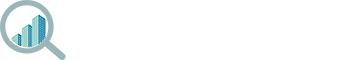
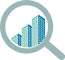
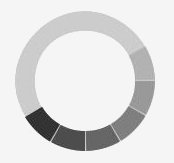

In [5]:
bs(response.text,"html.parser")

In [6]:
soup = bs(response.text,"html.parser")

In [23]:
soup.findAll("div", class_="zip-codes")

[<div class="zip-codes">
  Zip codes: <a href="#10001">10001</a>, <a href="#10002">10002</a>, <a href="#10003">10003</a>, <a href="#10004">10004</a>, <a href="#10005">10005</a>, <a href="#10006">10006</a>, <a href="#10007">10007</a>, <a href="#10009">10009</a>, <a href="#10010">10010</a>, <a href="#10011">10011</a>, <a href="#10012">10012</a>, <a href="#10013">10013</a>, <a href="#10014">10014</a>, <a href="#10016">10016</a>, <a href="#10017">10017</a>, <a href="#10018">10018</a>, <a href="#10019">10019</a>, <a href="#10020">10020</a>, <a href="#10021">10021</a>, <a href="#10022">10022</a>, <a href="#10023">10023</a>, <a href="#10024">10024</a>, <a href="#10025">10025</a>, <a href="#10026">10026</a>, <a href="#10027">10027</a>, <a href="#10028">10028</a>, <a href="#10029">10029</a>, <a href="#10030">10030</a>, <a href="#10031">10031</a>, <a href="#10032">10032</a>, <a href="#10033">10033</a>, <a href="#10034">10034</a>, <a href="#10035">10035</a>, <a href="#10036">10036</a>, <a href="#

In [149]:
tree = html.fromstring(response.content)
zips = tree.xpath('//div[@title="zip-codes"]/text()')


In [151]:
print ('Zips: ', zips)

Zips:  []


In [176]:
soup.findAll("div", class_="zip-codes", a_href="")

[<div class="zip-codes">
  Zip codes: <a href="#10001">10001</a>, <a href="#10002">10002</a>, <a href="#10003">10003</a>, <a href="#10004">10004</a>, <a href="#10005">10005</a>, <a href="#10006">10006</a>, <a href="#10007">10007</a>, <a href="#10009">10009</a>, <a href="#10010">10010</a>, <a href="#10011">10011</a>, <a href="#10012">10012</a>, <a href="#10013">10013</a>, <a href="#10014">10014</a>, <a href="#10016">10016</a>, <a href="#10017">10017</a>, <a href="#10018">10018</a>, <a href="#10019">10019</a>, <a href="#10020">10020</a>, <a href="#10021">10021</a>, <a href="#10022">10022</a>, <a href="#10023">10023</a>, <a href="#10024">10024</a>, <a href="#10025">10025</a>, <a href="#10026">10026</a>, <a href="#10027">10027</a>, <a href="#10028">10028</a>, <a href="#10029">10029</a>, <a href="#10030">10030</a>, <a href="#10031">10031</a>, <a href="#10032">10032</a>, <a href="#10033">10033</a>, <a href="#10034">10034</a>, <a href="#10035">10035</a>, <a href="#10036">10036</a>, <a href="#

[<html lang="en">
 <head>
 <meta charset="utf-8"/>
 <meta content="en" http-equiv="Content-Language"/>
 <meta content="IE=7, IE=9,IE=edge" http-equiv="X-UA-Compatible"/>
 <meta content="index, follow" name="robots"/>
 <meta content="all" name="robots"/>
 <meta content="all" name="googlebot"/>
 <meta msnbot="all" name="msnbot"/>
 <meta content="YES" name="apple-mobile-web-app-capable"/>
 <meta content="width=device-width, initial-scale=1" name="viewport"/>
 <!-- Quantcast Tag, part 1 -->
 <script type="text/javascript">
   var _qevents = _qevents || [];
   (function() {
   var elem = document.createElement('script');
   elem.src = (document.location.protocol == "https:" ? "https://secure" : "http://edge")
   + ".quantserve.com/quant.js";
   elem.async = true;
   elem.type = "text/javascript";
   var scpt = document.getElementsByTagName('script')[0];
   scpt.parentNode.insertBefore(elem, scpt);
   })();
 </script>
 <script type="text/javascript">window.ua={mobile:0};</script>
 <style>
 #
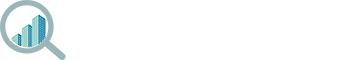
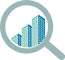
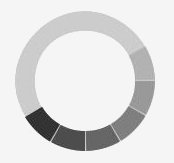
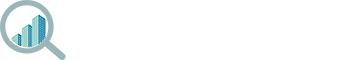
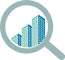
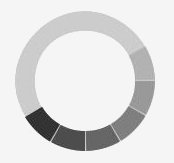
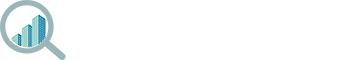
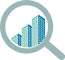
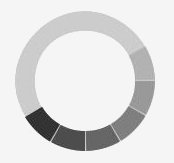

In [171]:
soup.find_all(id="")

In [130]:
zipco= soup.findAll("div", class_="zip-codes")

In [131]:
df3 = pd.DataFrame(zipco)
df3

0
0  <div class="zip-codes">
 Zip codes: <a href="...

In [54]:
zip_codes = soup.findAll('div', class_ = 'zip-codes')
print(type(zip_codes))
print(len(zip_codes))

<class 'bs4.element.ResultSet'>
1


In [55]:
zipcodes = zip_codes[0]
zipcodes

<div class="zip-codes">
 Zip codes: <a href="#10001">10001</a>, <a href="#10002">10002</a>, <a href="#10003">10003</a>, <a href="#10004">10004</a>, <a href="#10005">10005</a>, <a href="#10006">10006</a>, <a href="#10007">10007</a>, <a href="#10009">10009</a>, <a href="#10010">10010</a>, <a href="#10011">10011</a>, <a href="#10012">10012</a>, <a href="#10013">10013</a>, <a href="#10014">10014</a>, <a href="#10016">10016</a>, <a href="#10017">10017</a>, <a href="#10018">10018</a>, <a href="#10019">10019</a>, <a href="#10020">10020</a>, <a href="#10021">10021</a>, <a href="#10022">10022</a>, <a href="#10023">10023</a>, <a href="#10024">10024</a>, <a href="#10025">10025</a>, <a href="#10026">10026</a>, <a href="#10027">10027</a>, <a href="#10028">10028</a>, <a href="#10029">10029</a>, <a href="#10030">10030</a>, <a href="#10031">10031</a>, <a href="#10032">10032</a>, <a href="#10033">10033</a>, <a href="#10034">10034</a>, <a href="#10035">10035</a>, <a href="#10036">10036</a>, <a href="#10

In [166]:
for link in soup.find_all("a"):
    print("<a href='>%s'>%s</a>" % (link.get("href"), link.text))

<a href='>/'></a>
<a href='>/'></a>
<a href='>http://www.city-data.com/forum/'> Forum</a>
<a href='>#'>Cities </a>
<a href='>/city/Alaska.html'>AK</a>
<a href='>/city/Alabama.html'>AL</a>
<a href='>/city/Arkansas.html'>AR</a>
<a href='>/city/Arizona.html'>AZ</a>
<a href='>/city/California.html'>CA</a>
<a href='>/city/Colorado.html'>CO</a>
<a href='>/city/Connecticut.html'>CT</a>
<a href='>/city/District-of-Columbia.html'>DC</a>
<a href='>/city/Delaware.html'>DE</a>
<a href='>/city/Florida.html'>FL</a>
<a href='>/city/Georgia.html'>GA</a>
<a href='>/city/Hawaii.html'>HI</a>
<a href='>/city/Iowa.html'>IA</a>
<a href='>/city/Idaho.html'>ID</a>
<a href='>/city/Illinois.html'>IL</a>
<a href='>/city/Indiana.html'>IN</a>
<a href='>/city/Kansas.html'>KS</a>
<a href='>/city/Kentucky.html'>KY</a>
<a href='>/city/Louisiana.html'>LA</a>
<a href='>/city/Massachusetts.html'>MA</a>
<a href='>/city/Maryland.html'>MD</a>
<a href='>/city/Maine.html'>ME</a>
<a href='>/city/Michigan.html'>MI</a>
<a href='

In [169]:
def has_class_but_no_id(tag):
  return tag.has_attr('class') and not tag.has_attr('id')
soup.find_all(has_class_but_no_id)

[<div class="navbar navbar-inverse navbar-fixed-top" role="navigation"><div class="container-menu"><div class="navbar-header">
 <button class="navbar-toggle" data-target=".navbar-collapse" data-toggle="collapse" type="button">
 <span class="sr-only">Toggle navigation</span>
 <span class="icon-bar"></span>
 <span class="icon-bar"></span>
 <span class="icon-bar"></span>
 </button>
 <a class="navbar-brand" href="/"><div class="logo1" style="height:30px; width: 180px;" title="city-data.com"></div></a>
 <a class="navbar-brand" href="/"><div class="logo2" style="height:30px; width: 33px;" title="city-data.com"></div></a></div><div class="navbar-collapse collapse"><ul class="nav navbar-nav" id="menu_visible"><li id="menu_item_01"><a href="http://www.city-data.com/forum/"> <i class="icon-chat"></i>Forum</a></li><li class="dropdown sublink_dropdown" id="menu_item_02_drop">
 <a class="dropdown-toggle" data-hover="dropdown" data-toggle="dropdown" href="#">Cities <b class="caret"></b></a><ul class

In [167]:
general_data = soup.find_all('div', {'class' : 'zip-codes'})

In [74]:
zipcodes.a

<a href="#10001">10001</a>

In [58]:
zipcodes1 = zipcodes.a.text
zipcodes1

'10001'

In [64]:
results = soup.find_all('div', class_='zip-codes')

'\n\n\n\n\n\n\n\n\n\n\n\n\n\n  var _qevents = _qevents || [];\n  (function() {\n  var elem = document.createElement(\'script\');\n  elem.src = (document.location.protocol == "https:" ? "https://secure" : "http://edge")\n  + ".quantserve.com/quant.js";\n  elem.async = true;\n  elem.type = "text/javascript";\n  var scpt = document.getElementsByTagName(\'script\')[0];\n  scpt.parentNode.insertBefore(elem, scpt);\n  })();\n\nwindow.ua={mobile:0};\n\n#sticky-ad {height:800px;max-width:300px;}\n#left-ad {height:800px;max-width:300px;}\n#anchor-ad {display:none;}\n.horizontal-ad {min-height:90px;max-width:1200px;margin:5px auto;overflow:hidden;}\n\n\na,table{background-color:transparent}.dropdown-toggle:focus,.navbar-toggle:focus,a:active,a:hover{outline:0}hr,img{border:0}.sr-only,td{padding:0}button,h1,input,select{color:inherit;font-family:inherit}.breadcrumb,.dropdown-menu,.nav{list-style:none}html{font-family:sans-serif;-webkit-text-size-adjust:100%;-ms-text-size-adjust:100%}canvas{displa
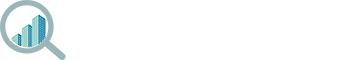
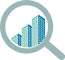
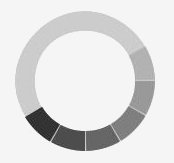

In [84]:
soup.get_text()

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="en" http-equiv="Content-Language"/>
  <meta content="IE=7, IE=9,IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="index, follow" name="robots"/>
  <meta content="all" name="robots"/>
  <meta content="all" name="googlebot"/>
  <meta msnbot="all" name="msnbot"/>
  <meta content="YES" name="apple-mobile-web-app-capable"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <!-- Quantcast Tag, part 1 -->
  <script type="text/javascript">
   var _qevents = _qevents || [];
  (function() {
  var elem = document.createElement('script');
  elem.src = (document.location.protocol == "https:" ? "https://secure" : "http://edge")
  + ".quantserve.com/quant.js";
  elem.async = true;
  elem.type = "text/javascript";
  var scpt = document.getElementsByTagName('script')[0];
  scpt.parentNode.insertBefore(elem, scpt);
  })();
  </script>
  <script type="text/javascript">
   window.ua={mobile:0
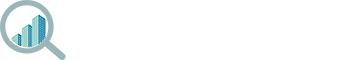
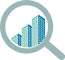
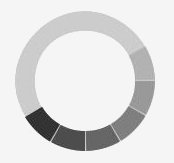

In [62]:
print(soup.prettify())

In [30]:
zipcodes_df = pd.read_html(url)
zipcodes_df

[    0   1    2    3    4    5    6
 0  AK  AL   AR   AZ   CA   CO   CT
 1  DC  DE   FL   GA   HI   IA   ID
 2  IL  IN   KS   KY   LA   MA   MD
 3  ME  MI   MN   MO   MS   MT   NC
 4  ND  NE   NH   NJ   NM   NV   NY
 5  OH  OK   OR   PA   RI   SC   SD
 6  TN  TX   UT   VA   VT   WA   WI
 7  WV  WY  NaN  NaN  NaN  NaN  NaN,     0   1   2   3   4   5    6
 0  AK  AL  AR  AZ  CA  CO   CT
 1  DE  FL  GA  HI  IA  ID   IL
 2  IN  KS  KY  LA  MA  ME   MI
 3  MN  MO  MS  MT  NC  ND   NE
 4  NH  NJ  NM  NV  NY  OH   OK
 5  OR  PA  RI  SC  SD  TN   TX
 6  VA  VT  WA  WI  WV  WY  NaN,     0   1   2   3   4   5    6
 0  AK  AL  AR  AZ  CA  CO   CT
 1  DE  FL  GA  HI  IA  ID   IL
 2  IN  KS  KY  LA  MA  ME   MI
 3  MN  MO  MS  MT  NC  ND   NE
 4  NH  NJ  NM  NV  NY  OH   OK
 5  OR  PA  RI  SC  SD  TN   TX
 6  VA  VT  WA  WI  WV  WY  NaN,     0   1   2   3    4    5    6
 0  AL  AZ  CA  CO   CT   DE   FL
 1  GA  HI  IA  ID   IL   IN   KS
 2  LA  MA  MD  MI   MN   MO   NC
 3  NE  NJ  NM  NV   NY   OH

In [32]:
type(zipcodes_df)

list

In [34]:
tables = pd.read_html("http://www.city-data.com/zipmaps/New-York-New-York.html")
print(tables[0])

    0   1    2    3    4    5    6
0  AK  AL   AR   AZ   CA   CO   CT
1  DC  DE   FL   GA   HI   IA   ID
2  IL  IN   KS   KY   LA   MA   MD
3  ME  MI   MN   MO   MS   MT   NC
4  ND  NE   NH   NJ   NM   NV   NY
5  OH  OK   OR   PA   RI   SC   SD
6  TN  TX   UT   VA   VT   WA   WI
7  WV  WY  NaN  NaN  NaN  NaN  NaN


In [24]:
soup.findAll("div", class_="zip-statistics")

[<div class="zip-statistics">
 <div class="zip data-block" id="10001">
 <strong>Zip code 10001 statistics:</strong> (<a href="javascript:sm(0);">Find on map</a>)<br/><br/>
 <b>Estimated zip code population in 2016:</b> 23,666<br/>
 <b>Zip code population in 2010:</b> 21,102<br/>
 <b>Zip code population in 2000:</b> 17,310<br/>
 <b>Mar. 2016 cost of living index in zip code 10001:</b> 153.9 <b>(very high, U.S. average is 100)</b><br/>
 <br/><b>Land area:</b> 0.6 <b>sq. mi.</b><br/>
 <b>Water area:</b> 0.0 <b>sq. mi.</b><br/>
 <table border="0" cellpadding="0" cellspacing="0"><tr><td><b>Population density:</b> 38,085 <b>people per square mile </b></td><td><div align="left"><table bgcolor="#000" border="2" bordercolor="#DDDD00" cellpadding="0" cellspacing="0" width="20"><tr><td> </td></tr></table></div></td> <td> (very high).</td></tr></table><br>
 <br><div align="left"><table border="0" cellpadding="0" cellspacing="0"><tr><td><b>Males:</b> 12,293 </td><td><img border="0" height="10" src=

In [125]:
results2 = soup.findAll("div", class_="zip-statistics")

In [126]:
df2 = pd.DataFrame(results)
df2

0
0    <div class="zip data-block" id="10001">
<stron...
1    <div class="zip data-block" id="10002">
<stron...
2    <div class="zip data-block" id="10003">
<stron...
3    <div class="zip data-block" id="10004">
<stron...
4    <div class="zip data-block" id="10005">
<stron...
5    <div class="zip data-block" id="10006">
<stron...
6    <div class="zip data-block" id="10007">
<stron...
7    <div class="zip data-block" id="10009">
<stron...
8    <div class="zip data-block" id="10010">
<stron...
9    <div class="zip data-block" id="10011">
<stron...
10   <div class="zip data-block" id="10012">
<stron...
11   <div class="zip data-block" id="10013">
<stron...
12   <div class="zip data-block" id="10014">
<stron...
13   <div class="zip data-block" id="10016">
<stron...
14   <div class="zip data-block" id="10017">
<stron...
15   <div class="zip data-block" id="10018">
<stron...
16   <div class="zip data-block" id="10019">
<stron...
17   <div class="zip data-block" id="10020">
<stron...
18   <div class="zip data-block" id="10021">
<stron...
19   <div class="zip data-block" id="10022">
<stron...
20   <div class="zip data-block" id="10023">
<stron...
21   <div class="zip data-block" id="10024">
<stron...
22   <div class="zip data-block" id="10025">
<stron...
23   <div class="zip data-block" id="10026">
<stron...
24   <div class="zip data-block" id="10027">
<stron...
25   <div class="zip data-block" id="10028">
<stron...
26   <div class="zip data-block" id="10029">
<stron...
27   <div class="zip data-block" id="10030">
<stron...
28   <div class="zip data-block" id="10031">
<stron...
29   <div class="zip data-block" id="10032">
<stron...
..                                                 ...
171  <div class="zip data-block" id="11379">
<stron...
172  <div class="zip data-block" id="11385">
<stron...
173  <div class="zip data-block" id="11411">
<stron...
174  <div class="zip data-block" id="11412">
<stron...
175  <div class="zip data-block" id="11413">
<stron...
176  <div class="zip data-block" id="11414">
<stron...
177  <div class="zip data-block" id="11415">
<stron...
178  <div class="zip data-block" id="11416">
<stron...
179  <div class="zip data-block" id="11417">
<stron...
180  <div class="zip data-block" id="11418">
<stron...
181  <div class="zip data-block" id="11419">
<stron...
182  <div class="zip data-block" id="11420">
<stron...
183  <div class="zip data-block" id="11421">
<stron...
184  <div class="zip data-block" id="11422">
<stron...
185  <div class="zip data-block" id="11423">
<stron...
186  <div class="zip data-block" id="11426">
<stron...
187  <div class="zip data-block" id="11427">
<stron...
188  <div class="zip data-block" id="11428">
<stron...
189  <div class="zip data-block" id="11429">
<stron...
190  <div class="zip data-block" id="11430">
<stron...
191  <div class="zip data-block" id="11432">
<stron...
192  <div class="zip data-block" id="11433">
<stron...
193  <div class="zip data-block" id="11434">
<stron...
194  <div class="zip data-block" id="11435">
<stron...
195  <div class="zip data-block" id="11436">
<stron...
196  <div class="zip data-block" id="11691">
<stron...
197  <div class="zip data-block" id="11692">
<stron...
198  <div class="zip data-block" id="11693">
<stron...
199  <div class="zip data-block" id="11694">
<stron...
200  <div class="zip data-block" id="11697">
<stron...

[201 rows x 1 columns]

In [76]:
soup.findAll("div", class_="zip data-block")

[<div class="zip data-block" id="10001">
 <strong>Zip code 10001 statistics:</strong> (<a href="javascript:sm(0);">Find on map</a>)<br/><br/>
 <b>Estimated zip code population in 2016:</b> 23,666<br/>
 <b>Zip code population in 2010:</b> 21,102<br/>
 <b>Zip code population in 2000:</b> 17,310<br/>
 <b>Mar. 2016 cost of living index in zip code 10001:</b> 153.9 <b>(very high, U.S. average is 100)</b><br/>
 <br/><b>Land area:</b> 0.6 <b>sq. mi.</b><br/>
 <b>Water area:</b> 0.0 <b>sq. mi.</b><br/>
 <table border="0" cellpadding="0" cellspacing="0"><tr><td><b>Population density:</b> 38,085 <b>people per square mile </b></td><td><div align="left"><table bgcolor="#000" border="2" bordercolor="#DDDD00" cellpadding="0" cellspacing="0" width="20"><tr><td> </td></tr></table></div></td> <td> (very high).</td></tr></table><br>
 <br><div align="left"><table border="0" cellpadding="0" cellspacing="0"><tr><td><b>Males:</b> 12,293 </td><td><img border="0" height="10" src="http://pics3.city-data.com/sg

In [ ]:
resultszip = soup.findAll("div", class_="zip data-block")


In [110]:
soup.find_all('div', class_="zip data-block", id=re.compile('^1'))

[<div class="zip data-block" id="10001">
 <strong>Zip code 10001 statistics:</strong> (<a href="javascript:sm(0);">Find on map</a>)<br/><br/>
 <b>Estimated zip code population in 2016:</b> 23,666<br/>
 <b>Zip code population in 2010:</b> 21,102<br/>
 <b>Zip code population in 2000:</b> 17,310<br/>
 <b>Mar. 2016 cost of living index in zip code 10001:</b> 153.9 <b>(very high, U.S. average is 100)</b><br/>
 <br/><b>Land area:</b> 0.6 <b>sq. mi.</b><br/>
 <b>Water area:</b> 0.0 <b>sq. mi.</b><br/>
 <table border="0" cellpadding="0" cellspacing="0"><tr><td><b>Population density:</b> 38,085 <b>people per square mile </b></td><td><div align="left"><table bgcolor="#000" border="2" bordercolor="#DDDD00" cellpadding="0" cellspacing="0" width="20"><tr><td> </td></tr></table></div></td> <td> (very high).</td></tr></table><br>
 <br><div align="left"><table border="0" cellpadding="0" cellspacing="0"><tr><td><b>Males:</b> 12,293 </td><td><img border="0" height="10" src="http://pics3.city-data.com/sg

In [134]:
results = soup.findAll("div", class_="zip data-block")

In [184]:
df = pd.DataFrame(results)
df.to_csv("Results.csv")

In [136]:
inner_text2 = soup.find("div", class_="zip data-block").text.strip()
inner_text2 

'Zip code 10001 statistics: (Find on map)\nEstimated zip code population in 2016: 23,666\nZip code population in 2010: 21,102\nZip code population in 2000: 17,310\nMar. 2016 cost of living index in zip code 10001: 153.9 (very high, U.S. average is 100)\nLand area: 0.6 sq. mi.\nWater area: 0.0 sq. mi.\nPopulation density: 38,085 people per square mile\xa0\xa0 \xa0(very high).\nMales: 12,293\xa0\xa0(51.9%)Females: 11,373\xa0\xa0(48.1%)\nReal estate property taxes paid for housing units in 2016: 1.0% ($5,201)\nMedian real estate property taxes paid for housing units with mortgages in 2016: $7,719 (1.4%)\nMedian real estate property taxes paid for housing units with no mortgage in 2016: $4,620 (0.8%)\n\nEstimated median house/condo value in 2016: $511,113Estimated median household income in 2016: $88,701Median monthly owner costs for units with a mortgage: $3,241\nMedian monthly owner costs for units without a mortgage: $461\nMedian gross rent in 2016: $2,185\nMedian price asked for vacant

In [96]:
inner_contents = soup.find("div", id="10001").contents
inner_contents

['\n',
 <strong>Zip code 10001 statistics:</strong>,
 ' (',
 <a href="javascript:sm(0);">Find on map</a>,
 ')',
 <br/>,
 <br/>,
 '\n',
 <b>Estimated zip code population in 2016:</b>,
 ' 23,666',
 <br/>,
 '\n',
 <b>Zip code population in 2010:</b>,
 ' 21,102',
 <br/>,
 '\n',
 <b>Zip code population in 2000:</b>,
 ' 17,310',
 <br/>,
 '\n',
 <b>Mar. 2016 cost of living index in zip code 10001:</b>,
 ' 153.9 ',
 <b>(very high, U.S. average is 100)</b>,
 <br/>,
 '\n',
 <br/>,
 <b>Land area:</b>,
 ' 0.6 ',
 <b>sq. mi.</b>,
 <br/>,
 '\n',
 <b>Water area:</b>,
 ' 0.0 ',
 <b>sq. mi.</b>,
 <br/>,
 '\n',
 <table border="0" cellpadding="0" cellspacing="0"><tr><td><b>Population density:</b> 38,085 <b>people per square mile </b></td><td><div align="left"><table bgcolor="#000" border="2" bordercolor="#DDDD00" cellpadding="0" cellspacing="0" width="20"><tr><td> </td></tr></table></div></td> <td> (very high).</td></tr></table>,
 <br>
 <br><div align="left"><table border="0" cellpadding="0" cellspacing=

In [143]:
inner_text = soup.find("div", id="10001").text.strip()
inner_text 

'Zip code 10001 statistics: (Find on map)\nEstimated zip code population in 2016: 23,666\nZip code population in 2010: 21,102\nZip code population in 2000: 17,310\nMar. 2016 cost of living index in zip code 10001: 153.9 (very high, U.S. average is 100)\nLand area: 0.6 sq. mi.\nWater area: 0.0 sq. mi.\nPopulation density: 38,085 people per square mile\xa0\xa0 \xa0(very high).\nMales: 12,293\xa0\xa0(51.9%)Females: 11,373\xa0\xa0(48.1%)\nReal estate property taxes paid for housing units in 2016: 1.0% ($5,201)\nMedian real estate property taxes paid for housing units with mortgages in 2016: $7,719 (1.4%)\nMedian real estate property taxes paid for housing units with no mortgage in 2016: $4,620 (0.8%)\n\nEstimated median house/condo value in 2016: $511,113Estimated median household income in 2016: $88,701Median monthly owner costs for units with a mortgage: $3,241\nMedian monthly owner costs for units without a mortgage: $461\nMedian gross rent in 2016: $2,185\nMedian price asked for vacant

In [145]:
soup.find_all('br')

[<br/>,
 <br/>,
 <br><input name="B1" src="http://pics3.city-data.com/images/btsearch.png" type="image" value="Search"/></br>,
 <br>
 </br>,
 <br/>,
 <br/>,
 <br>
 <div class="zip-codes">
  Zip codes: <a href="#10001">10001</a>, <a href="#10002">10002</a>, <a href="#10003">10003</a>, <a href="#10004">10004</a>, <a href="#10005">10005</a>, <a href="#10006">10006</a>, <a href="#10007">10007</a>, <a href="#10009">10009</a>, <a href="#10010">10010</a>, <a href="#10011">10011</a>, <a href="#10012">10012</a>, <a href="#10013">10013</a>, <a href="#10014">10014</a>, <a href="#10016">10016</a>, <a href="#10017">10017</a>, <a href="#10018">10018</a>, <a href="#10019">10019</a>, <a href="#10020">10020</a>, <a href="#10021">10021</a>, <a href="#10022">10022</a>, <a href="#10023">10023</a>, <a href="#10024">10024</a>, <a href="#10025">10025</a>, <a href="#10026">10026</a>, <a href="#10027">10027</a>, <a href="#10028">10028</a>, <a href="#10029">10029</a>, <a href="#10030">10030</a>, <a href="#10031

In [139]:
soup.find_all('b')


[<b class="caret"></b>,
 <b class="caret"></b>,
 <b class="caret"></b>,
 <b class="caret"></b>,
 <b class="caret"></b>,
 <b class="caret"></b>,
 <b class="caret"></b>,
 <b class="caret"></b>,
 <b>a detailed profile</b>,
 <b>a detailed profile</b>,
 <b>Business Search</b>,
 <b>14 Million</b>,
 <b>Estimated zip code population in 2016:</b>,
 <b>Zip code population in 2010:</b>,
 <b>Zip code population in 2000:</b>,
 <b>Mar. 2016 cost of living index in zip code 10001:</b>,
 <b>(very high, U.S. average is 100)</b>,
 <b>Land area:</b>,
 <b>sq. mi.</b>,
 <b>Water area:</b>,
 <b>sq. mi.</b>,
 <b>Population density:</b>,
 <b>people per square mile </b>,
 <b>Males:</b>,
 <b>Females:</b>,
 <b>Real estate property taxes paid for housing units in 2016:</b>,
 <b>Median real estate property taxes paid for housing units with mortgages in 2016:</b>,
 <b>Median real estate property taxes paid for housing units with no mortgage in 2016:</b>,
 <b>Estimated median house/condo value in 2016:</b>,
 <b>Esti